# Übung 7

**Gruppenname:**

Gruppenname: TSRI
<ul>
    <li>Christian Rene Thelen @cortex359
    <li>Leonard Schiel @leo_paticumbum</li>
    <li>Marine Raimbault @Marine Raimbault</li>
    <li>Alexander Ivanets @sandrium</li>
</ul>


Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### In dieser Übung ...

... werden Sie zunächst Multidimensionales Skalieren (MDS) implementieren und anwenden (Übung 7.1). MDS wird dann der Ausgangspunkt sein, dass Sie eine nichtlineare Dimensionsreduktion mit Isomap (Übung 7.2) durchführen können.

### 7.1 Städte in Deutschland (Multidimensionales Skalieren)

In dieser Übung werden Sie Multidimensionales Skalieren implementieren und damit die Daten einer Distanzmatrix visualisieren: Sie erhalten die Entfernung (in Autobahnkilometer) zwischen deutschen Großstädten und finden mithilfe von MDS Koordinaten, mit denen Sie die Position dieser Städte visualisieren können.

**Ihre Aufgaben**

Bearbeiten Sie bitte alle Aufgaben mit *Numpy* und die Visualisierung später mit *Matplotlib*.

(1) Importieren Sie Ihre Daten, indem Sie die unten stehende Code-Zelle ausführen.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Matrix der Distanzen (in Autobahnkilometern)
M = np.array([[0, 548, 289, 576, 586],
              [548, 0, 493, 195, 392],
              [289, 493, 0, 427, 776],
              [576, 195, 427, 0, 577],
              [586, 392, 776, 577, 0]])

# Zugehörige Labels
labels = ['Berlin', 'Frankfurt', 'Hamburg', 'Köln', 'München']

(2) Schlagen Sie in den Vorlesungsfolien nach, wie die Multidimensionale Skalierung in einzelnen Schritten durchgeführt wird.

Die Matrix `M` enthält Distanzen. Aber die Multidimensionale Skalierung erwartet eine Distanzmatrix `D`, in der die Distanzen quadriert vorliegen. Erzeugen Sie nun die Distanzmatrix `D`.

In [2]:
D = M * M
print(D)

[[     0 300304  83521 331776 343396]
 [300304      0 243049  38025 153664]
 [ 83521 243049      0 182329 602176]
 [331776  38025 182329      0 332929]
 [343396 153664 602176 332929      0]]


(3) Erzeugen Sie die Matrix `B` mithilfe der Matrix `D`. Dieser Schritt wird auch *Double Centering* (Doppelzentrierung) genannt.

In [3]:
N = D.shape[1]
H = np.identity(N) - 1 / N * np.ones((N, N))

B = 0.5 * np.multiply(np.multiply(H, D), H)
print(B)

[[    0.    6006.08  1670.42  6635.52  6867.92]
 [ 6006.08     0.    4860.98   760.5   3073.28]
 [ 1670.42  4860.98     0.    3646.58 12043.52]
 [ 6635.52   760.5   3646.58     0.    6658.58]
 [ 6867.92  3073.28 12043.52  6658.58     0.  ]]


(4) Führen Sie nun eine [Eigenwertzerlegung](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) der Matrix `B` durch.

* Sortieren Sie die Eigenwerte in absteigender Reihenfolge.
* Sortieren Sie die Eigenvektoren in der Reihenfolge der Eigenwerte. Beachten Sie, dass die Eigenvektoren *den Spalten der von Numpy zurückgegebenen Matrix* entsprechen.

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(B)
eigenvectors = eigenvectors.transpose()
idx = np.argsort(eigenvalues)
idx = np.flip(idx)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[idx]
print(f'Eigenvales: {eigenvalues}')
print(f'Eigenvectors: {eigenvectors}')

Eigenvales: [ 21772.35503976    560.95120215   -284.94978088  -8258.9050342
 -13789.45142684]
Eigenvectors: [[-4.25770922e-01 -3.19962532e-01 -4.85258944e-01 -3.96251967e-01
  -5.69079288e-01]
 [-6.30691767e-01 -2.67478212e-01  5.97426656e-01 -2.80636393e-01
   3.08233526e-01]
 [ 1.71818166e-03 -7.78252632e-01 -1.36073513e-01  5.97725894e-01
   1.36116287e-01]
 [-5.43643976e-01  4.12862822e-01  8.87031744e-02  6.37927355e-01
  -3.45218705e-01]
 [-3.54111977e-01  2.23487168e-01 -6.17430882e-01 -1.99749879e-04
   6.65910849e-01]]


(5) Berechnen Sie die *Proportion of Distance Matrix Explained* (PDME).

* Können Sie einen Ellbogenverlauf erkennen?
* Wie viele Dimensionen (Komponenten) sollte jeder Datenpunkt haben, dessen Koordinaten Sie rekonstruieren werden?

[ 21772.35503976    560.95120215   -284.94978088  -8258.9050342
 -13789.45142684]


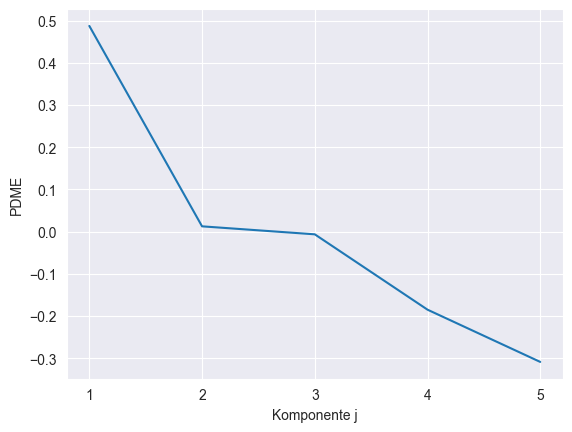

In [5]:
eigenval_sum = np.sum(np.abs(eigenvalues))
print(eigenvalues)
pdme = [eig_val / eigenval_sum for eig_val in eigenvalues]
plt.plot(pdme)
plt.xlabel('Komponente j')
plt.xticks(np.arange(0, N, 1), np.arange(1, N + 1, 1))
plt.ylabel('PDME')
plt.show()

(6) Eliminierung negativer Eigenwerte:

  * Haben Sie in Schritt 4 negative Eigenwerte beobachtet? Verwerfen Sie diese mitsamt den assoziierten Eigenvektoren. Am Ende der Übung erkläre ich Ihnen, warum Sie negative Eigenwerte beobachten könnten.

In [6]:
eigenvalues = eigenvalues[:2]
eigenvectors = eigenvectors[:2]

(7) Konstruieren Sie mit den Eigenvektoren und Eigenwerten aus Schritt (6) die Datenmatrix `X`. Schlagen Sie dazu in der Vorlesung nach, wie dies geht. Wählen Sie für die Konstruktion so viele Features (Dimensionen) aus, wie Sie in Schritt (5) über die PDME ermittelt haben.

In [12]:
eigvals_sqrt = np.sqrt(eigenvalues)
X = eigvals_sqrt * eigenvectors.transpose()
print(X)

[[-62.82445099 -14.93756139]
 [-47.21193814  -6.33506322]
 [-71.60218126  14.14969692]
 [-58.46879378  -6.64670696]
 [-83.97025716   7.30032873]]


(8) [Visualisieren Sie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) die Daten in den von Ihnen in Schritt (7) ermittelten Koordinaten. [Beschriften Sie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) jeden Datenpunkt mit dem Namen der jeweiligen Stadt, die er repräsentiert.

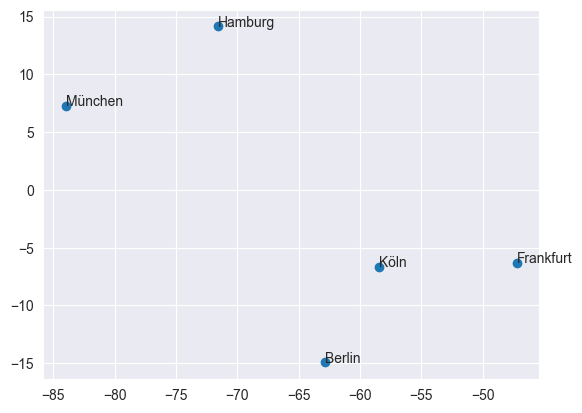

In [15]:
plt.scatter(x = X[:, 0], y = X[:, 1])
for i in range(len(labels)):
    plt.annotate(labels[i], (X[i][0], X[i][1]))

(9) Ähnelt Ihre Abbildung aus Schritt (8) der geografischen Lage dieser deutschen Städte? Falls Sie Unterschiede bemerken, woran könnten diese Unterschiede liegen? (1-3 Sätze)

Die unterscheiden sich sehr, weil wir die negative Eigenvalues haben.

**Anmerkung zum Auftreten negativer Eigenwerte**

Wenn die Matrix $B$ aus euklidischen Distanzen hergeleitet wurde, gilt $B=XX^\text{T}$. In diesem Fall ist die Matrix $B$ positiv-semidefinit:

$$\mathbf{a}^\text{T}B\mathbf{a} = \mathbf{a}^\text{T}XX^\text{T}\mathbf{a} = \left(X\mathbf{a}\right)^\text{T}\left(X\mathbf{a}\right) \geq 0 \qquad\forall \mathbf{a}$$

Damit gilt insbesondere für alle ihre Eigenwerte: $\lambda_i\geq0$.

Wenn Sie nun für eine Matrix $B$, die Sie aus einer Matrix $D$ konstruiert haben, negative Eigenwerte beobachten, bedeutet dies, dass die Matrix $D$ keine "euklidische Distanzmatrix" ist, d.h. keine euklidischen Distanzen zwischen Objekten enthält. Dies ist nicht weiter schlimm. In der Praxis werden negative Eigenwerte und assoziierte Eigenvektoren verworfen. Daneben wird für die Berechnung der PDME im Nenner die Absolutbeträge der Eigenwerte verwendet.

### 7.2 Schweizer Rollkuchen (nichtlineare Dimensionsreduktion mit Isomap)

Die PCA erlaubt Ihnen die Extraktion von linearen Strukturen aus hochdimensionalen Räumen. Allerdings liegen in der Realität Daten auf nichtlinearen Mannigfaltigkeiten vor. In dieser Übung lernen Sie Isomap kennen, mithilfe dessen Sie genau solche nichtlineare Strukturen extrahieren können. Das Paper zu Isomap wurde seinerzeit im renommierten Magazin *Science* [publiziert](http://www.robots.ox.ac.uk/~az/lectures/ml/tenenbaum-isomap-Science2000.pdf). Isomap ist eine Variante des Multidimensionalen Skalierens, allerdings werden die paarweisen Distanzen zwischen den Datenpunkten auf eine andere Art bestimmt als in der klassischen MDS.

**Ihre Daten**

Sie bearbeiten einen klassischen Datensatz: Den sogenannten *Schweizer Rollkuchen* (swiss roll). Wenn Sie wissen wollen, wie dieser Kuchen aussieht, schauen Sie doch zum Beispiel [hier](https://tinyurl.com/roll-cake) vorbei.

**Ihre Aufgaben**

* Nutzen Sie im Nachfolgenden Ihren Code aus Übung 7.1 (MDS), um Isomap zu implementieren.

(1) Führen Sie die unten stehende Code-Zelle aus, um den Datensatz zu erzeugen und um Bibliotheken zu importieren.

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.metrics import pairwise_distances
from scipy.sparse.csgraph import shortest_path
from sklearn.neighbors import kneighbors_graph
from mpl_toolkits.mplot3d import Axes3D

# Ihre Daten
X, t = make_swiss_roll(1000, random_state=100)  # X: Koordinaten, t: Variable, die die Farbe jedes Datenpunktes kodiert

(2) Visualisieren Sie zunächst die Daten in einem [dreidimensionalen Scatterplot](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html). Achten Sie darauf, dass Sie die Datenpunkte [farbkodieren](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) gemäß ihrer Variablen `t`.

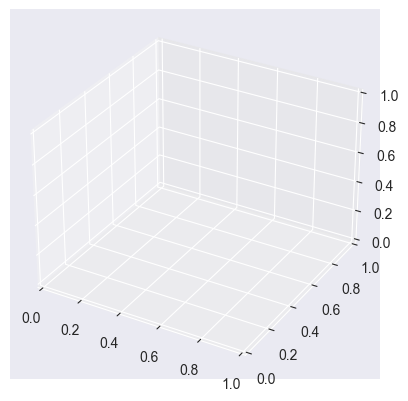

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')


(3) Schlagen Sie in der Vorlesung nach, wie Isomap in einzelnen Schritten durchgeführt wird.

   * Bestimmen Sie zunächst eine Matrix $M=(m_{ij})$, wobei $m_{ij}$ der euklidischen Distanz zwischen Datenpunkt $i$ und $j$ entspricht. Wichtig: Hier sind die Distanzen euklidisch und noch nicht quadriert.

(4) Erzeugen Sie aus $M$ einen K-nächste-Nachbarn Graphen.

  * Nutzen Sie dafür aus scikit-learn den Befehl [kneighbors_graph](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html) und nutzen Sie für die Anzahl nächster Nachbarn zunächst $K=10$.
  * Achten Sie darauf, dass bei der Erstellung des Graphen die euklidischen Abstände zurückgegeben werden. Sie müssen dazu neben $M$ und $K$ **einen zusätzlichen Parameter** der Funktion anpassen.
  * Die entstehende Matrix ist *sparse*. Wenn Sie sich diese Matrix einmal visualisieren wollen, müssen Sie sie in eine gewöhnliche Form [transformieren](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.todense.html).

(5) Ermittelten Sie die Matrix $Y$ der kürzesten Graphdistanzen für alle Paare von Punkten.

  * Nutzen Sie dafür aus scipy den Befehl [shortest_path](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csgraph.shortest_path.html).
  * Wenn Sie wollen, können Sie sich die Matrix dieses Graphen einmal [visualisieren](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

(6) Bestimmen Sie für $Y$ eine neue Datenmatrix (Koordinaten) $Z$ mithilfe einer Multidimensionalen Skalierung (MDS). Nutzen Sie dafür Ihren Code aus Übung 7.1.

  * Erinnern Sie sich: Der erste Schritt der MDS besteht darin, die Einträge einer Distanzmatrix zu quadrieren, bevor die Matrix $B$ bestimmt wird. Vergessen Sie also nicht, die Einträge der Matrix $Y$ zu quadrieren.

(7) Untersuchen Sie die *Proportion of Distance Matrix Explained* (PDME): Wie hochdimensional wird die nichtlineare Struktur sein, die in den Daten vorhanden ist? (1-2 Worte)

(8) [Visualisieren Sie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) die Daten mithilfe der Koordinaten $Z$ und farbkodieren Sie sie gemäß `t`.

(9) \[Optional\] Erzeugen Sie Abbildungen wie in Schritt (8), aber für verschiedene Werte von $K$ für die Konstruktion des Nachbarschaftsgraphen. Was fällt Ihnen auf?
